###  INICIALIZAÇÃO

#### Importação de bibliotecas

In [1]:
import os
from exif import Image as Im
from PIL import Image

import pandas as pd

#print(f'diretorio atual: {os.getcwd()}')
#os.chdir(os.path.abspath(os.path.dirname(__file__))) #entrando no diretorio atual
#print(f'diretorio atual: {os.getcwd()}')



#### Acessando o banco de dados

In [5]:
#main_dir = r'C:\Users\Vitor\Desktop\IC\Cod\maquinavirtual\maqvirtual'
#os.chdir(main_dir)
os.getcwd()
#pwd, ls


'c:\\Users\\Vitor\\Desktop\\IC\\Cod\\maquinavirtual\\maqvirtual'

In [3]:
try:
    os.mkdir("Dados")
except:
    print("A pasta Dados já existe")
try:
    os.mkdir("Imagem")
except:
    print("A pasta Imagem já existe")



d = { 'Coordenada(DMS)':[],
    'Coordenada_lat(DD)':[],
    'Coordenada_long(DD)':[],
    'altitude':[],
    'Assunto':[],
    "Texto":[],
    'ID':[],
    'fileName': [],
    "Data_foto": [],
    'Data_email': [],
    'From_Email': []
     }
# coordenadas DMS, DD lat, DD log, altitude, assunto, texto, id, fileName, data_foto, data_Email, from_Email, 

A pasta Dados já existe


#### Coordenadas

In [7]:
# graus decimais
def dec_coord(coords, ref): 
    decimal_degrees = coords[0] + coords[1] / 60 + coords[2] / 3600 
    if ref == 'S' or ref == 'W': 
        decimal_degrees = -decimal_degrees 
    return decimal_degrees

#### informação da imagem

In [8]:
# DMS, DD_lat, DD_log, altitude, data_foto
def prop_img(fileName):

    end_img =  'Imagem' + os.sep + fileName

    with open(end_img, 'rb') as arq_img: ## wb escrita
        img = Im(arq_img)
        if(img.has_exif):
            try:
                DMS = []
                DMS.append(img.gps_latitude)
                DMS.append(img.gps_latitude_ref)
                DMS.append(img.gps_longitude)
                DMS.append(img.gps_longitude_ref)

                DD_lat = dec_coord(img.gps_latitude,img.gps_latitude_ref)
                DD_lon = dec_coord(img.gps_longitude, img.gps_longitude_ref)
                altitude = img.gps_altitude
                data_foto = img.datetime_original
                
                return str(DMS), DD_lat, DD_lon, altitude, data_foto
            except:
                print('erro no exif')
                return 'NA', 'NA','NA','NA','NA'
        else:
            print('Não tem exif')
            return 'NA','NA','NA','NA','NA'



####  E-mails

In [9]:
########################## Usar esse para baixar imagem ##########################
import email
import imaplib

EMAIL = 'jaguarfb2015@gmail.com'
PASSWORD ='toorpljtqpzkgqif'

#EMAIL = 'vitorhgsd@gmail.com'
#PASSWORD = 'xaeliekypnnpjiqv'

SERVER = 'imap.gmail.com'

# abriremos uma conexão com SSL com o servidor de emails
mail = imaplib.IMAP4_SSL(SERVER)
mail.login(EMAIL, PASSWORD)

# selecionamos a caixa de entrada neste caso
mail.select('inbox')

status, data = mail.search(None, 'ALL')
# Busca em email que não foram abertos
#status, data = mail.search(None, ('UNSEEN'))

mail_ids = []

for block in data:
    mail_ids += block.split()

for i in mail_ids:
    # a função fetch baixa o email passando id e o formato
    status, data = mail.fetch(i, '(RFC822)')
  
    message1 = email.message_from_string(data[0][1].decode('utf-8'))
    list_fileName = []

    Data_E = message1['Date']
    From = message1['From']
    for a in message1.walk():
        #print('AA:\n',a)
        #a.append('===========fim do a ----------------')
        if a.get_content_type() == 'image/jpeg':
            fileName = a.get_filename()
            foto = a.get_payload(decode=True)
            #print('fileName2: ',fileName)
            with open(f'Imagem{os.sep}{fileName}','wb')as arquivo:
                arquivo.write(foto)
            list_fileName.append(fileName)

        if a.get_content_type() == 'application/octet-stream':
            fileName = a.get_filename()
            foto = a.get_payload(decode=True)
            #print('fileName1: ',fileName)
            with open(f'Imagem{os.sep}{fileName}','wb')as arquivo:
                arquivo.write(foto)
            list_fileName.append(fileName)

        if a.get_content_type() == 'text/plain':
            msg = a.get_payload()
           # print('mensagem: ',msg)

        if a.get('Subject') is not None:
            ass = a.get('Subject') 
            #print('assunto: ',ass)
    
    #Escrevendo na planilha 
    if len(list_fileName) > 0:  # tem foto?
        print("################### Entrou ####################3")
        for fileName in list_fileName: # percorre cada foto 
            DMS, DD_lat, DD_log, altitude, data_foto = prop_img(fileName) # coord igual a -1 se não tem exif

            d['Coordenada(DMS)'].append(DMS)
            d['Coordenada_lat(DD)'].append(DD_lat)
            d['Coordenada_long(DD)'].append(DD_log)
            d['altitude'].append(altitude)
            d['Data_foto'].append(data_foto)
            

            d['Assunto'].append(ass)
            d['fileName'].append(fileName)
            d['ID'].append(i)
            d['Texto'].append(msg)
            d['From_Email'].append(From)
            d['Data_email'].append(Data_E)

    print('FRom: ',From)
    print("DATA Email: ", Data_E)
    print('id = ',i)
    print('------------------------outro email-----------------------------------------------')


FRom:  Equipe da comunidade do Google <googlecommunityteam-noreply@google.com>
DATA Email:  Thu, 14 Jul 2022 17:18:06 -0700
id =  b'1'
------------------------outro email-----------------------------------------------
FRom:  Julio Cesar de Souza <julio.souza@ufms.br>
DATA Email:  Thu, 14 Jul 2022 20:39:29 -0400
id =  b'2'
------------------------outro email-----------------------------------------------
FRom:  The Google Account Team <google-noreply@google.com>
DATA Email:  Mon, 18 Jul 2022 14:25:48 -0700
id =  b'3'
------------------------outro email-----------------------------------------------
FRom:  Mail Delivery Subsystem <mailer-daemon@googlemail.com>
DATA Email:  Mon, 18 Jul 2022 15:03:35 -0700 (PDT)
id =  b'4'
------------------------outro email-----------------------------------------------
FRom:  Mail Delivery Subsystem <mailer-daemon@googlemail.com>
DATA Email:  Mon, 18 Jul 2022 15:03:35 -0700 (PDT)
id =  b'5'
------------------------outro email-----------------------------

#### Finalizando

In [10]:
#Gravar os dados em excel
dados = pd.DataFrame(data=d)
dados.to_excel(f'Dados{os.sep}dados.xlsx', index=False)

In [12]:
#  imprimindo os dados da planilha
matrix = pd.read_excel(f'Dados{os.sep}dados.xlsx')
matrix

,Coordenada(DMS),Coordenada_lat(DD),Coordenada_long(DD),altitude,Assunto,Texto,ID,fileName,Data_foto,Data_email,From_Email
0,NaN,NaN,NaN,NaN,JCS,\n,b'13',c5a9435b-a1d7-43b4-973c-16f733e6a8cd.JPG,NaN,"Tue, 26 Jul 2022 18:10:08 +0000",Julio Cesar de Souza <julio.souza@ufms.br>
1,NaN,NaN,NaN,NaN,JCS,\n,b'13',e889829e-59de-4686-9d21-b7d44616464b.JPG,NaN,"Tue, 26 Jul 2022 18:10:08 +0000",Julio Cesar de Souza <julio.souza@ufms.br>
2,NaN,NaN,NaN,NaN,JCS,\n,b'13',3960e32b-53b1-400b-8677-8aefda4ead5f.JPG,NaN,"Tue, 26 Jul 2022 18:10:08 +0000",Julio Cesar de Souza <julio.souza@ufms.br>
3,NaN,NaN,NaN,NaN,JCS,\n,b'13',c23a5077-32ff-4c6e-82cb-3831634e38ae.JPG,NaN,"Tue, 26 Jul 2022 18:10:08 +0000",Julio Cesar de Souza <julio.souza@ufms.br>
4,NaN,NaN,NaN,NaN,JCS,\n,b'13',2c39a941-d5ba-4847-b3fa-b4b3c22b92f6.JPG,NaN,"Tue, 26 Jul 2022 18:10:08 +0000",Julio Cesar de Souza <julio.souza@ufms.br>
...,...,...,...,...,...,...,...,...,...,...,...
139,NaN,NaN,NaN,NaN,Foto de Jair - Fazenda Bodoquena,\n,b'99',IMG-20220820-WA0001.jpg,NaN,"Wed, 21 Sep 2022 17:51:15 -0400",Camila Santiago <camilasantiagosilva@gmail.com>
140,NaN,NaN,NaN,NaN,Foto de Jair - Fazenda Bodoquena,\n,b'100',IMG-20220827-WA0000.jpg,NaN,"Wed, 21 Sep 2022 17:51:15 -0400",Camila Santiago <camilasantiagosilva@gmail.com>
141,"[(19.0, 59.0, 50.326), 'S', (56.0, 53.0, 15.17...",-19.997313,-56.887549,170.0,NaN,\n,b'101',TimePhoto_20220902_092254.jpg,2022:09:02 09:22:54,"Wed, 21 Sep 2022 17:51:19 -0400",Camila Santiago <camilasantiagosilva@gmail.com>
142,"[(19.0, 59.0, 49.639), 'S', (56.0, 53.0, 20.12...",-19.997122,-56.888924,170.0,NaN,\n,b'102',TimePhoto_20220903_082712.jpg,2022:09:03 08:27:12,"Wed, 21 Sep 2022 17:51:17 -0400",Camila Santiago <camilasantiagosilva@gmail.com>


### Acessando imagens (teste)


In [1]:
print(len(d['fileName']))
print(len(d['Coordenada']))
print(len(d['Assunto']))
print(len(d["Texto"]))
print(len(d['ID']))

[2]

In [11]:
end_img = r'C:\Users\Vitor\Desktop\IC\Cod\maquinavirtual\maqvirtual\Imagem\IMG-3756.jpg'
#end_img = r'Imagem\20220726_090026.jpg'
with open(end_img, 'rb') as arq_img: ## wb escrita
    img = Im(arq_img)
    #print(img.has_exif)
    #print(end_img)
    #print(img.get_all())
    print(img.list_all())

['make', 'model', 'orientation', 'x_resolution', 'y_resolution', 'resolution_unit', 'software', 'datetime', 'y_and_c_positioning', '_exif_ifd_pointer', '_gps_ifd_pointer', 'compression', 'jpeg_interchange_format', 'jpeg_interchange_format_length', 'exposure_time', 'f_number', 'exposure_program', 'photographic_sensitivity', 'exif_version', 'datetime_original', 'datetime_digitized', 'offset_time', 'offset_time_original', 'offset_time_digitized', 'components_configuration', 'shutter_speed_value', 'aperture_value', 'brightness_value', 'exposure_bias_value', 'metering_mode', 'flash', 'focal_length', 'subject_area', 'maker_note', 'subsec_time_original', 'subsec_time_digitized', 'flashpix_version', 'color_space', 'pixel_x_dimension', 'pixel_y_dimension', 'sensing_method', 'scene_type', 'exposure_mode', 'white_balance', 'digital_zoom_ratio', 'focal_length_in_35mm_film', 'scene_capture_type', 'lens_specification', 'lens_make', 'lens_model', 'gps_latitude_ref', 'gps_latitude', 'gps_longitude_ref

In [12]:
# data quando a foto foi tirada
img.datetime_original

'2022:07:08 07:58:17'

None


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
for a in message1.walk():
    #print(a)
    print('AAA:', a['Date'])

In [ ]:
#img.list_all()

In [9]:

#print(img.gps_latitude)
#print(img.gps_latitude_ref)
#print(img.gps_longitude)
#print(img.gps_longitude_ref)
a = []
a.append(img.gps_latitude)
a.append(img.gps_latitude_ref)
a.append(img.gps_longitude)
a.append(img.gps_longitude_ref)
a

[(20.0, 6.0, 7.44), 'S', (56.0, 47.0, 49.52), 'W']

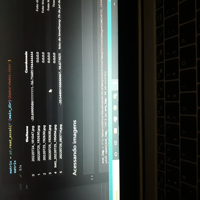

In [24]:
from PIL import Image
end_img = r'Imagem\20220726_090026.jpg'
imag = Image.open(end_img)
imag.resize((200,200))